In [1]:
import numpy as np
from scipy.integrate import ode
from scipy.constants import pi, hbar, m_n
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
#EOS given in Eq.2.38 of the paper, given a value of dimensionless central pressure, 
#returns a dimensionless central density
def inveos(w0):
    return (((w0/k)**(1/Gamma))+(w0/(Gamma-1)))

In [3]:
def proper_mass_1(w0c):
    return (6.397451431801374e-9*w0c**0.4273504273504274 + 7.462684558318427e-10*w0c)

In [4]:
#Dimensionless differential equations. 
##The dimensionless variables are those given in the paper. A0t=Sqrt[8 pi G]*A0.
##Because of the Euler-Lagrange equations for the vectorial field, for mu=0, we have A0''(r), 
##so I decided to split this equation in two of them, the first one relates A0t'(x)=u, and the second one shows
#the second derivative of A0t or u'(x).
##This function returns the value of each derivative for the calculations of the Runge-Kutta.
def feqs(x,z):
    w0, m, mp, A0t, u, f, h = z
    y=inveos(w0)
    dmdx=3*y*x**2
    dmpdx=3*y*x**2/math.sqrt(h)
    dfdx=-(f/x) + f/(h*x) - (u**2*x)/2. + (8*f*pi*w0*x)/h
    dw0dx=-(dfdx*(w0 + y))/(2.*f)
    dA0tdx=u
    dudx=(-4*A0t*B3t*f**2*h**2*u**2*x**2*(4*f + dfdx*x)*(4*f + x*(dfdx + u**2*x)) + 
           8*A0t**4*B3t*f**2*h*u*x*(h*x*(8*dfdx - u**2*x) + 2*f*(3 + h + 40*pi*w0*x**2 + 8*dw0dx*pi*x**3)) + 
           2*h*u*math.sqrt(A0t*(A0t*dfdx - 2*f*u)*x)*(4*f + dfdx*x)**2*math.sqrt(f*h*(4*f + dfdx*x))*
            ((h*x*(2*dfdx + u**2*x))/2. - f*(1 + 3*h - 8*pi*x**2*y)) + 
           4*A0t**2*B3t*f**2*u*x*((h*x**2*(-(h*(2*dfdx**2 + 7*dfdx*u**2*x + u**4*x**2)) + dfdx*(2*dfdx + u**2*x)*(1 + 8*pi*w0*x**2)))/
               2. + f*x*(-(h**2*(23*dfdx + 29*u**2*x)) + 
                 h*(4*dfdx*(1 + 12*pi*w0*x**2 + 2*dw0dx*pi*x**3) + u**2*(5*x + 56*pi*w0*x**3 + 8*dw0dx*pi*x**4)) + 
                 dfdx*(-1 - 8*pi*w0*x**2)*(1 - 8*pi*x**2*y)) - 
              4*f**2*(19*h**2 - 8*h*pi*x**2*(2*w0 + dw0dx*x) + (1 + 8*pi*w0*x**2)*(1 - 8*pi*x**2*y))) + 
           8*A0t**3*B3t*f**2*(-(h*x**2*(h*(-8*dfdx**2 - 5*dfdx*u**2*x + 2*u**4*x**2) + dfdx*(2*dfdx + u**2*x)*(-1 - 8*pi*w0*x**2)))/2. + 
              f*x*(h**2*(17*dfdx - 20*u**2*x) + 4*h*(dfdx + 2*u**2*x)*(1 + 12*pi*w0*x**2 + 2*dw0dx*pi*x**3) + 
                 dfdx*(-1 - 8*pi*w0*x**2)*(1 - 8*pi*x**2*y)) + 
              4*f**2*(h**2 + 8*h*pi*x**2*(2*w0 + dw0dx*x) - (1 + 8*pi*w0*x**2)*(1 - 8*pi*x**2*y))))/(4.*f*h*x*(h*math.sqrt(A0t*(A0t*dfdx - 2*f*u)*x)*(4*f + dfdx*x)**2*math.sqrt(f*h*(4*f + dfdx*x)) + 
             4*A0t**3*B3t*f*u*x**2*(h*x*(dfdx + u**2*x) + 2*f*(-1 + 2*h - 8*pi*w0*x**2)) + 
             4*A0t**4*B3t*f*x*(h*u**2*x**2 - 2*f*(1 + 8*pi*w0*x**2)) + 
             A0t**2*B3t*f*x*(16*f**2*h + h*x**2*(dfdx + u**2*x)**2 + 2*f*x*(4*dfdx*h - u**2*x*(1 - 4*h + 8*pi*w0*x**2)))))
    dhdx=-(h*(4*A0t*B3t*f**2*h*u**3*x**4*(4*f + dfdx*x) - 
              8*A0t**4*B3t*f**2*x*(2*f*(-1 + h + 8*pi*w0*x**2 + 8*dw0dx*pi*x**3) + 
                 x*(-(h*(-8*dfdx + u**2*x + 2*dudx*u*x**2)) + 2*dfdx*(1 + 8*pi*w0*x**2))) + 
              8*A0t**3*B3t*f**2*x**2*(x*(h*(-3*dfdx*u + dfdx*dudx*x + u**3*x + 2*dudx*u**2*x**2) - 2*dfdx*u*(1 + 8*pi*w0*x**2)) + 
                 2*f*(2*dudx*h*x + u*(1 + 9*h - 8*pi*w0*x**2 - 8*dw0dx*pi*x**3))) + 
              2*A0t**2*B3t*f**2*u*x**3*(x*(h*(6*dfdx*u + 2*dfdx*dudx*x + u**3*x + 2*dudx*u**2*x**2) - 2*dfdx*u*(1 + 8*pi*w0*x**2)) + 
                 2*f*(4*dudx*h*x + u*(1 + 27*h - 8*pi*w0*x**2 - 8*dw0dx*pi*x**3))) - 
              math.sqrt(A0t*(A0t*dfdx - 2*f*u)*x)*(4*f + dfdx*x)**2*math.sqrt(f*h*(4*f + dfdx*x))*(h*u**2*x**2 + 2*f*(-1 + h + 8*pi*x**2*y))))/(2.*f*x*(-(h*math.sqrt(A0t*(A0t*dfdx - 2*f*u)*x)*(4*f + dfdx*x)**2*math.sqrt(f*h*(4*f + dfdx*x))) + 
             8*A0t**4*B3t*f**2*x*(1 + 8*pi*w0*x**2) + 8*A0t**3*B3t*f**2*u*x**2*(1 + 8*pi*w0*x**2) + 
             2*A0t**2*B3t*f**2*u**2*x**3*(1 + 8*pi*w0*x**2)))
    return np.array([dw0dx, dmdx, dmpdx, dA0tdx, dudx, dfdx, dhdx])

In [5]:
def feqssolv(w0c): #It solves the set of differential equations given a dimensionless central pressure.
    eqs=ode(feqs) #It calls the set of differential equations defined above
    eqs.set_integrator('dopri5', atol=1e-10) #The package 'dopri5' contains a Runge-Kutta of 4th order with adaptative step.
    x=np.arange(1e-3, 0.445792, dx) #It creates an arrangement for x. (It is long enough for all posible results, about 40km in r).
    m=np.zeros_like(x) #It creates an arrangement for m of the same length of x, but full of zeros.
    w0=np.zeros_like(x)
    A0t=np.zeros_like(x)
    u=np.zeros_like(x)
    f=np.zeros_like(x)
    h=np.zeros_like(x)
    mp=np.zeros_like(x)
    
    #The next lines calculate initial conditions for each variable, this equations were obtained using eqs. 3.8-3.11
    # and 3.15 for the mass, the dimensionless version of them was obtained using the dimensionless quantities 
    # that paper suggests. I replaced Gamma, K, and, yc (central density) using the EOS given in eq.2.38 of the paper.  
    #B3t=\tilde{\beta_3} (latex language), given in the chapter of cubic couplings, numerical solutions. 
    w0gen=6.633787136581382e-35*(1.5074345609999996e34*w0c - 1.2921451760330025e30*(1.*w0c**0.4273504273504274 + 0.27296310183238126*w0c)*(1.*w0c**0.4273504273504274 + 0.5855875090592112*w0c + a0b**3*B3t*(-0.004664598725749088*a0b*B3t + 0.002332299362874544*a0b**3*B3t + 0.004664598725749089*math.sqrt(6.3974531539019175*w0c**0.4273504273504274 + 0.746268656716418*w0c)*math.sqrt((a0b**2*(0.1563122036134149 - 0.1563122036134149*a0b**2 + 0.03907805090335373*a0b**4)*B3t**2 + 33.510321638291124*w0c**0.4273504273504274 + 19.623225775939883*w0c)/(1.*w0c**0.4273504273504274 + 0.11665089821896636*w0c)))))
    A0t0gen=6.249999999999997e-8*a0b*(1.6000000000000004e7 + a0b*B3t*(-2.*a0b*B3t + 1.*a0b**3*B3t + 2.0000000000000004*math.sqrt(6.3974531539019175*w0c**0.4273504273504274 + 0.746268656716418*w0c)*math.sqrt((a0b**2*(0.1563122036134149 - 0.1563122036134149*a0b**2 + 0.03907805090335373*a0b**4)*B3t**2 + 33.510321638291124*w0c**0.4273504273504274 + 19.623225775939886*w0c)/(1.*w0c**0.4273504273504274 + 0.11665089821896636*w0c))))
    u0gen=0.00025*a0b**2*B3t*(-0.9999999999999999*a0b*B3t + 0.49999999999999994*a0b**3*B3t + math.sqrt(6.3974531539019175*w0c**0.4273504273504274 + 0.746268656716418*w0c)*math.sqrt((a0b**2*(0.1563122036134149 - 0.1563122036134149*a0b**2 + 0.03907805090335373*a0b**4)*B3t**2 + 33.510321638291124*w0c**0.4273504273504274 + 19.623225775939886*w0c)/(1.*w0c**0.4273504273504274 + 0.11665089821896636*w0c)))
    f0gen=1 + 0.000026797589106644154*w0c**0.4273504273504274 + 0.000015692333453752*w0c + a0b**3*B3t*(-1.2499999999999997e-7*a0b*B3t + 6.249999999999998e-8*a0b**3*B3t + 1.25e-7*math.sqrt(6.3974531539019175*w0c**0.4273504273504274 + 0.746268656716418*w0c)*math.sqrt((a0b**2*(0.1563122036134149 - 0.1563122036134149*a0b**2 + 0.03907805090335373*a0b**4)*B3t**2 + 33.510321638291124*w0c**0.4273504273504274 + 19.623225775939883*w0c)/(1.*w0c**0.4273504273504274 + 0.11665089821896636*w0c)))
    h0gen=1 - 0.0000535951782132883*w0c**0.4273504273504274 - 6.251925678785657e-6*w0c + a0b**3*B3t*(2.499999999999999e-7*a0b*B3t - 1.2499999999999994e-7*a0b**3*B3t - 2.4999999999999994e-7*math.sqrt(6.3974531539019175*w0c**0.4273504273504274 + 0.746268656716418*w0c)*math.sqrt((a0b**2*(0.1563122036134149 - 0.1563122036134149*a0b**2 + 0.03907805090335373*a0b**4)*B3t**2 + 33.510321638291124*w0c**0.4273504273504274 + 19.623225775939883*w0c)/(1.*w0c**0.4273504273504274 + 0.11665089821896636*w0c)))
    m0gen=6.3974531539019175e-9*w0c**0.4273504273504274 + 7.46268656716418e-10*w0c + a0b**3*B3t*(-2.984155182973037e-11*a0b*B3t + 1.4920775914865186e-11*a0b**3*B3t + 2.984155182973038e-11*math.sqrt(6.3974531539019175*w0c**0.4273504273504274 + 0.746268656716418*w0c)*math.sqrt((a0b**2*(0.1563122036134149 - 0.1563122036134149*a0b**2 + 0.03907805090335373*a0b**4)*B3t**2 + 33.510321638291124*w0c**0.4273504273504274 + 19.623225775939883*w0c)/(1.*w0c**0.4273504273504274 + 0.11665089821896636*w0c)))
    mp0gen=proper_mass_1(w0c)
    
    #Next lines assign initial conditions as the initial value of each arange. 
    m[0]=m0gen
    mp[0]=mp0gen
    w0[0]=w0gen
    A0t[0]=A0t0gen
    u[0]=u0gen
    f[0]=f0gen
    h[0]=h0gen
    z=np.array([w0[0], m[0], mp[0], A0t[0], u[0], f[0], h[0]])#It creates an array with the initial values
    eqs.set_initial_value(z,x[0])#It assigns initial values for the RK4. 
    i=0
    #This cicle integrates differentail equations while the pressure is positive e.g until it reaches the edge of the star.
    while eqs.successful()  and w0[i] > 0.0 and i < len(x)-1:
        eqs.integrate(x[i] + dx)
        w0[i+1] = eqs.y[0]
        m[i+1] = eqs.y[1]
        mp[i+1] = eqs.y[2]
        A0t[i+1]=eqs.y[3]
        u[i+1] = eqs.y[4]
        f[i+1] = eqs.y[5]
        h[i+1] = eqs.y[6]
        i=i+1
    return x[i-1], m[i-1], mp[i-1] #Return the value of radius and mass of the star.

In [6]:
def mass_radio_Graph(B3tp):
    w0c=np.arange(0.3,148.9,0.1)# It defines a range of central pressures with step 0.1
    M=np.zeros_like(w0c)#This defines an arange for the mass of the star, of the same length of w0c
    Mp=np.zeros_like(w0c)
    X=np.zeros_like(w0c)
    
    j=0
    for j in range (len(w0c)):
        X[j], M[j], Mp[j]=feqssolv(w0c[j])
        #Here It assigns for each value of w0c a value for X (dimensionless radius of the star) and M(dimensionless mass of the star.)   
    return [X, M, Mp]

In [7]:
Gamma = 2.34 #polytropic index
k=0.0130
dx=0.0001 #Step value for x

In [8]:
#It makes the mass-radius calculations for a given value of B3t and a0b.
B3t=-1.0
a0b=1.0
mass_radio_a=mass_radio_Graph(2)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/home/william/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


In [9]:
B3t=-1.0
a0b=2.0
mass_radio_b=mass_radio_Graph(2)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [10]:
B3t=-1.0
a0b=2.2
mass_radio_c=mass_radio_Graph(2)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [11]:
B3t=-1.0
a0b=2.4
mass_radio_d=mass_radio_Graph(2)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [12]:
B3t=1.0
a0b=2.0
mass_radio_e=mass_radio_Graph(2)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [13]:
B3t=0.0
a0b=0.00000000000001
mass_radio_GR=mass_radio_Graph(2)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


# RESULTS

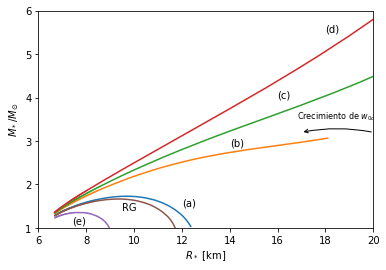

In [25]:
#Each model corresponds to that of figure 2 of the paper, case a to e. 
plt.plot(mass_radio_a[0]*89.7285,mass_radio_a[1]*254.62)
plt.plot(mass_radio_b[0]*89.7285,mass_radio_b[1]*254.62)
plt.plot(mass_radio_c[0]*89.7285,mass_radio_c[1]*254.62)
plt.plot(mass_radio_d[0]*89.7285,mass_radio_d[1]*254.62)
plt.plot(mass_radio_e[0]*89.7285,mass_radio_e[1]*254.62)
plt.plot(mass_radio_GR[0]*89.7285,mass_radio_GR[1]*254.62)
texto1 = plt.text(7.4, 1.1, r'(e)', fontsize=10)
texto2 = plt.text(9.5, 1.4, r'RG', fontsize=10)
texto3 = plt.text(12, 1.5, r'(a)', fontsize=10)
texto4 = plt.text(14, 2.9, r'(b)', fontsize=10)
texto5 = plt.text(16, 4, r'(c)', fontsize=10)
texto6 = plt.text(18, 5.5, r'(d)', fontsize=10)
plt.xlim(right=20,left=6)
plt.ylim(bottom=1,top=6)
texto7 = plt.text(16.8, 3.5, r'Crecimiento de $w_{0c}$', fontsize=8)
#plt.yscale("log")
#plt.legend(('$H^1$', '$H^2$',),prop = {'size': 10}, loc='lower right')
# Hago un señalización con flecha
nota = plt.annotate(r''
                    ,xy=(17, 3.2),xycoords='data'
                    ,xytext=(20, 3.2),fontsize=9
                    ,arrowprops=dict(arrowstyle="->"
                    ,connectionstyle="arc3,rad=.1"))
plt.xlabel('$R_*$ [km]')
plt.ylabel('$M_*/M_{\odot}$')
#plt.grid()
plt.savefig('masaradiocub.pdf', format='pdf', dpi=1200)
plt.show()


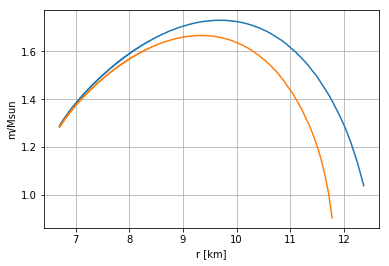

In [15]:
plt.plot(mass_radio_a[0]*89.7285,mass_radio_a[1]*254.62)
plt.plot(mass_radio_GR[0]*89.7285,mass_radio_GR[1]*254.62)
plt.xlabel('r [km]')
plt.ylabel('m/Msun')
#plt.savefig('masaradiocubRG.pdf', format='pdf', dpi=1200)
plt.grid()
plt.show()

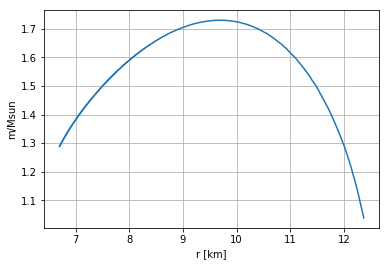

In [16]:
plt.plot(mass_radio_a[0]*89.7285,mass_radio_a[1]*254.62)
plt.xlabel('r [km]')
plt.ylabel('m/Msun')
#plt.savefig('masaradiocubRG.pdf', format='pdf', dpi=1200)
plt.grid()
plt.show()

In [ ]:
plt.plot(mass_radio_GR[0]*89.7285,mass_radio_GR[1]*254.62)
plt.xlabel('r [km]')
plt.ylabel('m/Msun')
plt.grid()
plt.show()

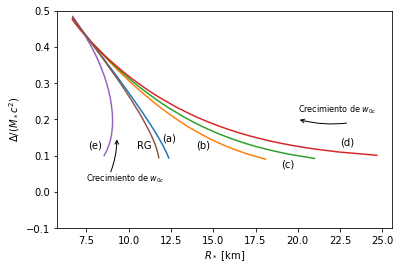

In [24]:
plt.plot(mass_radio_a[0]*89.7285,(mass_radio_a[2]-mass_radio_a[1])/mass_radio_a[1])
plt.plot(mass_radio_b[0]*89.7285,(mass_radio_b[2]-mass_radio_b[1])/mass_radio_b[1])
plt.plot(mass_radio_c[0]*89.7285,(mass_radio_c[2]-mass_radio_c[1])/mass_radio_c[1])
plt.plot(mass_radio_d[0]*89.7285,(mass_radio_d[2]-mass_radio_d[1])/mass_radio_d[1])
plt.plot(mass_radio_e[0]*89.7285,(mass_radio_e[2]-mass_radio_e[1])/mass_radio_e[1])
plt.plot(mass_radio_GR[0]*89.7285,(mass_radio_GR[2]-mass_radio_GR[1])/mass_radio_GR[1])
plt.plot
texto1 = plt.text(7.6, 0.12, r'(e)', fontsize=10)
texto2 = plt.text(10.5, 0.12, r'RG', fontsize=10)
texto3 = plt.text(12, 0.14, r'(a)', fontsize=10)
texto4 = plt.text(14, 0.12, r'(b)', fontsize=10)
texto5 = plt.text(19, 0.07, r'(c)', fontsize=10)
texto6 = plt.text(22.5, 0.13, r'(d)', fontsize=10)
#plt.xlim(right=20,left=6)
plt.ylim(bottom=-0.1,top=0.5)
texto7 = plt.text(20, 0.22, r'Crecimiento de $w_{0c}$', fontsize=8)
#plt.yscale("log")
#plt.legend(('$H^1$', '$H^2$',),prop = {'size': 10}, loc='lower right')
# Hago un señalización con flecha
nota = plt.annotate(r''
                    ,xy=(20, 0.20),xycoords='data'
                    ,xytext=(23, 0.19),fontsize=9
                    ,arrowprops=dict(arrowstyle="->"
                    ,connectionstyle="arc3,rad=-.1"))
texto8 = plt.text(7.5, 0.03, r'Crecimiento de $w_{0c}$', fontsize=8)
nota = plt.annotate(r''
                    ,xy=(9.3, 0.15),xycoords='data'
                    ,xytext=(8.9, 0.05),fontsize=9
                    ,arrowprops=dict(arrowstyle="->"
                    ,connectionstyle="arc3,rad=.1"))
plt.xlabel('$R_*$ [km]')
plt.ylabel('$\Delta/(M_* c^2)$')
#plt.grid()
plt.savefig('bindingcub.pdf', format='pdf', dpi=1200)
plt.show()